In [6]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib
import pickle
import requests
import json

In [7]:
# 1. Load dataset
df = pd.read_csv('data_balita.csv')
print(df.head())

   Umur (bulan) Jenis Kelamin  Tinggi Badan (cm)       Status Gizi
0             0     laki-laki          44.591973           stunted
1             0     laki-laki          56.705203            tinggi
2             0     laki-laki          46.863358            normal
3             0     laki-laki          47.508026            normal
4             0     laki-laki          42.743494  severely stunted


In [8]:
# 2. Preprocessing data
# mengkodekan jenis kelamin
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})
# mengkodekan status gizi
df['Status Gizi'] = df['Status Gizi'].map({'severely stunted': 'stunting', 'stunted': 'stunting', 'normal': 'normal', 'tinggi': 'tinggi'})


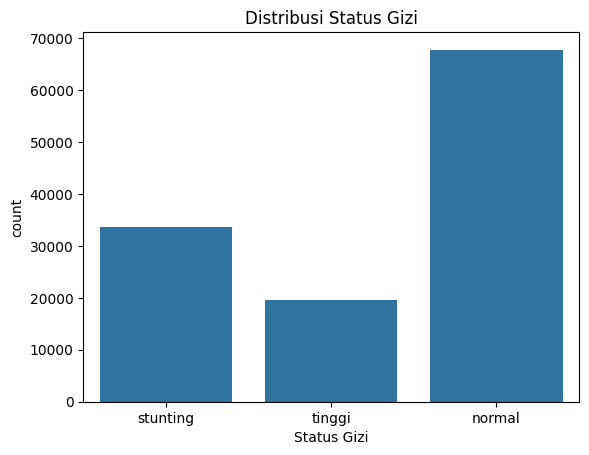

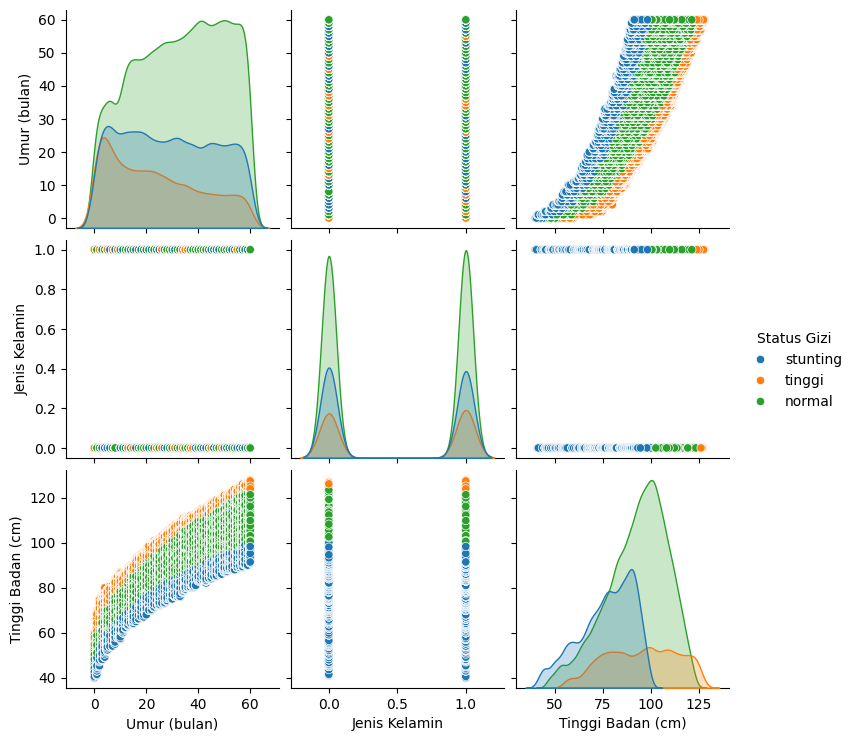

In [9]:
# 3. Visualisasi data
sns.countplot(x='Status Gizi', data=df)
plt.title('Distribusi Status Gizi')
plt.show()

sns.pairplot(df, hue='Status Gizi')
plt.show()

In [10]:
# 4. Memisahkan fitur dan target
X = df.drop('Status Gizi', axis=1)
y = df['Status Gizi']

In [11]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 5. Memodelkan model KNN
# membuat objek KNN dengan k=3
knn = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
# melatih model KNN dengan data latih
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

In [13]:
# 6. Mengevaluasi model
# membuat prediksi dengan data uji
y_pred = knn.predict(X_test)

# menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi model KNN:', accuracy)

# Menampilkan confusion matrix dan classification report
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Classification Report:')
print(classification_report(y_test, y_pred))

Akurasi model KNN: 0.9989256198347107
Confusion Matrix:
[[13368     5     9]
 [    8  6912     0]
 [    4     0  3894]]
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     13382
    stunting       1.00      1.00      1.00      6920
      tinggi       1.00      1.00      1.00      3898

    accuracy                           1.00     24200
   macro avg       1.00      1.00      1.00     24200
weighted avg       1.00      1.00      1.00     24200



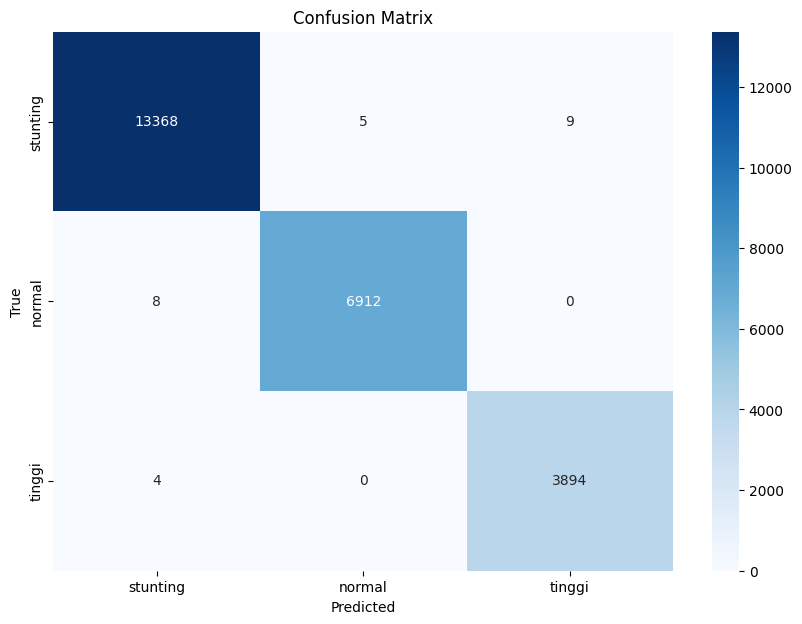

In [14]:
# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['stunting', 'normal', 'tinggi'], yticklabels=['stunting', 'normal', 'tinggi'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Cross-validation
cross_val_scores = cross_val_score(knn, X, y, cv=5)
print('Cross-validation scores:', cross_val_scores)
print('Mean cross-validation accuracy:', np.mean(cross_val_scores))

Cross-validation scores: [0.49140496 0.44545455 0.56661157 0.62169421 0.64626637]
Mean cross-validation accuracy: 0.5542863327799558


In [ ]:
joblib.dump(knn, "model.pkl")
print("Model telah disimpan sebagai model.pkl")

In [16]:
url = "http://127.0.0.1:8000/predict"

In [17]:
def kirim_permintaan(data):
    headers = {"Content-Type": "application/json"}
    response = requests.post(url, data=json.dumps(data), headers=headers)
    return response.json()

In [18]:
data_contoh = {
    "umur": 20,
    "jenis_kelamin": "perempuan",
    "tinggi_badan": 77.0
}

In [20]:
hasil = kirim_permintaan(data_contoh)
print("Hasil Prediksi:", hasil)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
# 7. Test / Simulasi
test = pd.DataFrame({'Umur (bulan)': [20], 'Jenis Kelamin': [1], 'Tinggi Badan (cm)': [77]})
pred = knn.predict(test)
print("Hasil Tes = {}".format(np.array(pred)))

Hasil Tes = ['normal']


In [ ]:
import pickle 

filename = 'data_balita.sav'
pickle.dump(knn, open(filename, 'wb'))